In [21]:
import os

os.environ['OMP_NUM_THREADS'] = '1'

In [ ]:
import pandas as pd
import numpy as np

# Change path as desired
DATA_PATH = "./datasets/"

train = pd.read_csv(DATA_PATH + "training_set.csv")

X = np.array(train.iloc[:,:5])
y = np.array(train.iloc[:,5])

In [23]:
X_labeled = X[y != 0]
y_labeled = y[y != 0]
X_unlabeled = X[y == 0]

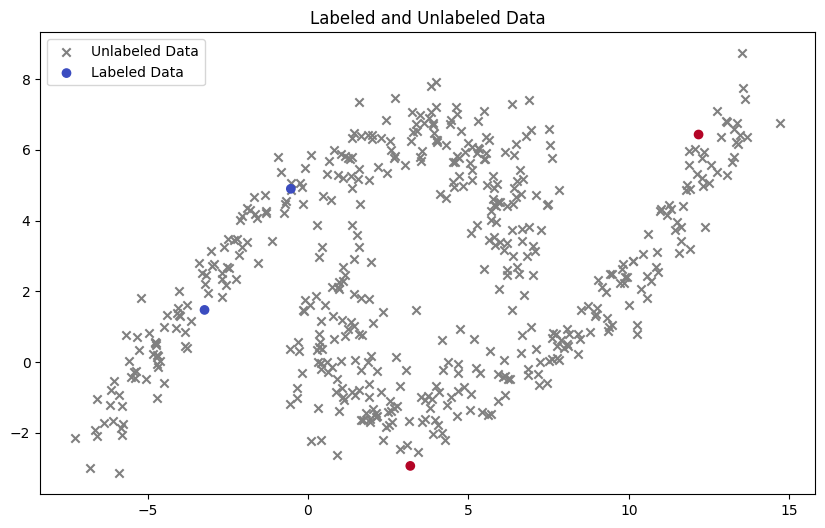

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], color='gray', marker='x', label='Unlabeled Data')
plt.scatter(X_labeled[:, 0], X_labeled[:, 1], c=y_labeled, cmap='coolwarm', label='Labeled Data')
plt.legend()
plt.title('Labeled and Unlabeled Data')
plt.show()

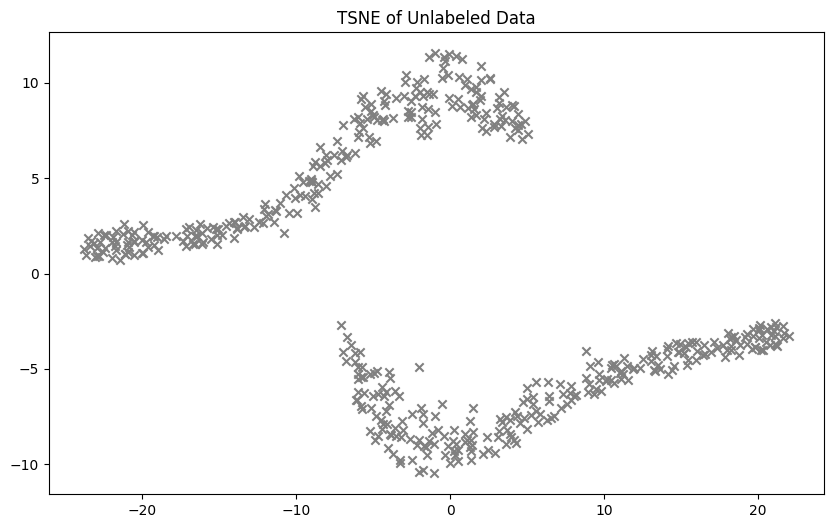

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=50)

X_unlabeled_tsne = tsne.fit_transform(X_unlabeled)

plt.figure(figsize=(10, 6))
plt.scatter(X_unlabeled_tsne[:, 0], X_unlabeled_tsne[:, 1], color='gray', marker='x')
plt.title('TSNE of Unlabeled Data')
plt.show()

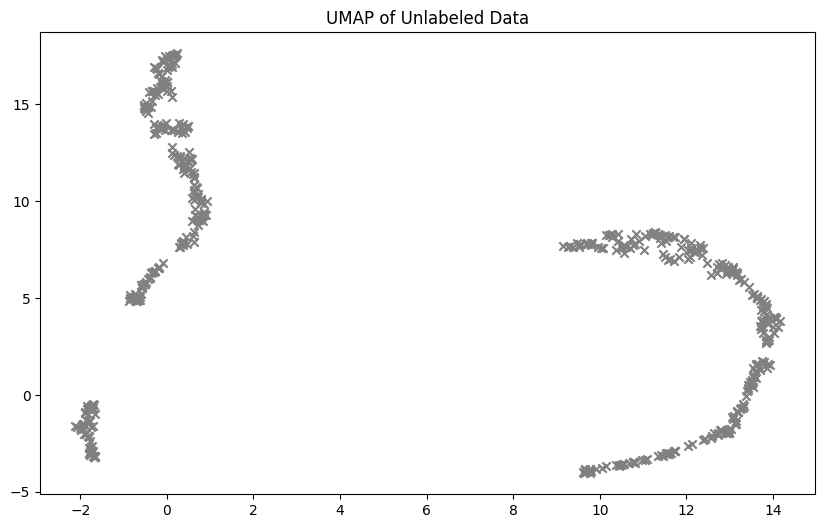

In [26]:
import umap as um

umap = um.UMAP(n_jobs=1, n_components=2, random_state=42)
X_unlabeled_umap = umap.fit_transform(X=X_unlabeled)

plt.figure(figsize=(10, 6))
plt.scatter(X_unlabeled_umap[:, 0], X_unlabeled_umap[:, 1], color='gray', marker='x')
plt.title('UMAP of Unlabeled Data')
plt.show()

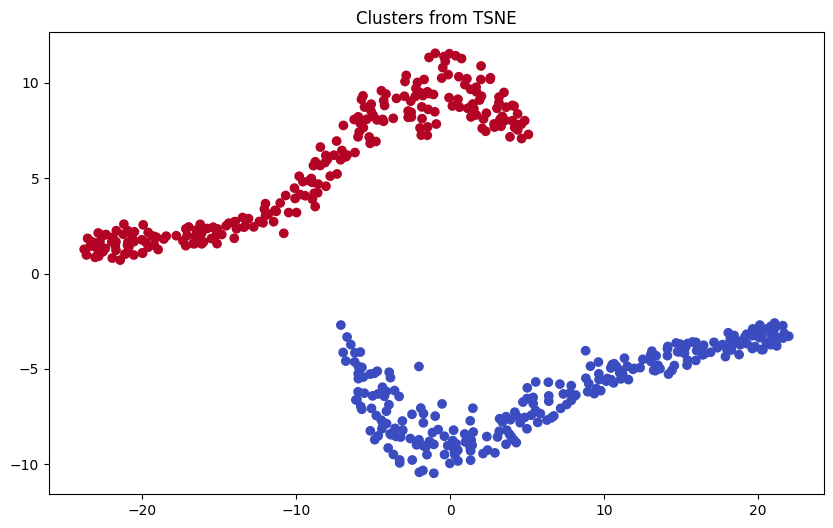

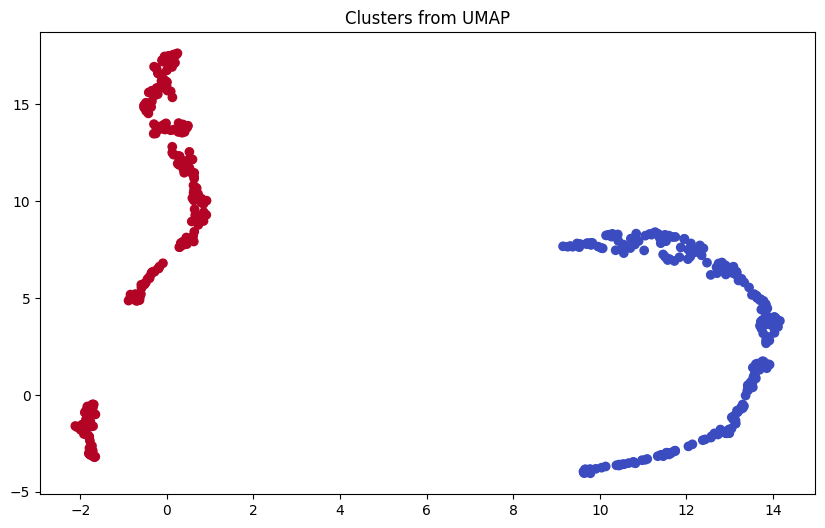

In [27]:
from sklearn.cluster import DBSCAN

dbscan_tsne = DBSCAN(eps=4, min_samples=10)
dbscan_umap = DBSCAN(eps=6, min_samples=10)
dbscan_tsne.fit(X_unlabeled_tsne)
dbscan_umap.fit(X_unlabeled_umap)

plt.figure(figsize=(10, 6))
plt.scatter(X_unlabeled_tsne[:, 0], X_unlabeled_tsne[:, 1], c=dbscan_tsne.labels_, cmap='coolwarm', marker='o')
plt.title('Clusters from TSNE')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_unlabeled_umap[:, 0], X_unlabeled_umap[:, 1], c=dbscan_umap.labels_, cmap='coolwarm', marker='o')
plt.title('Clusters from UMAP')
plt.show()

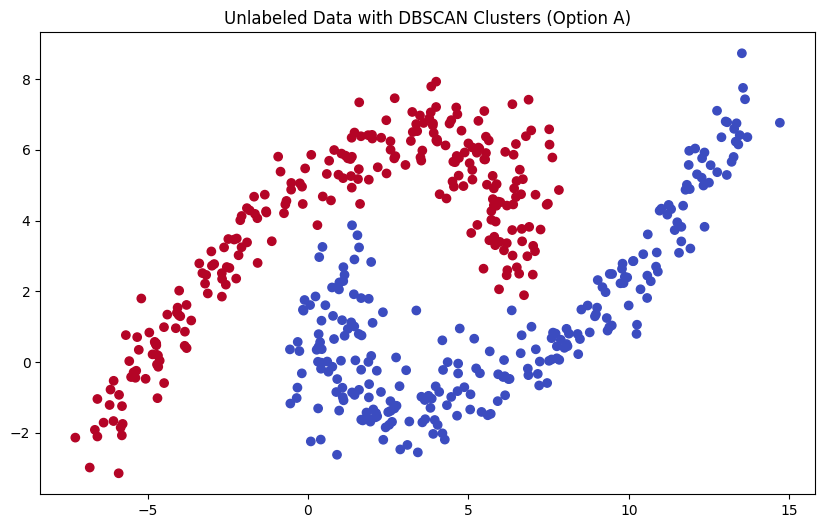

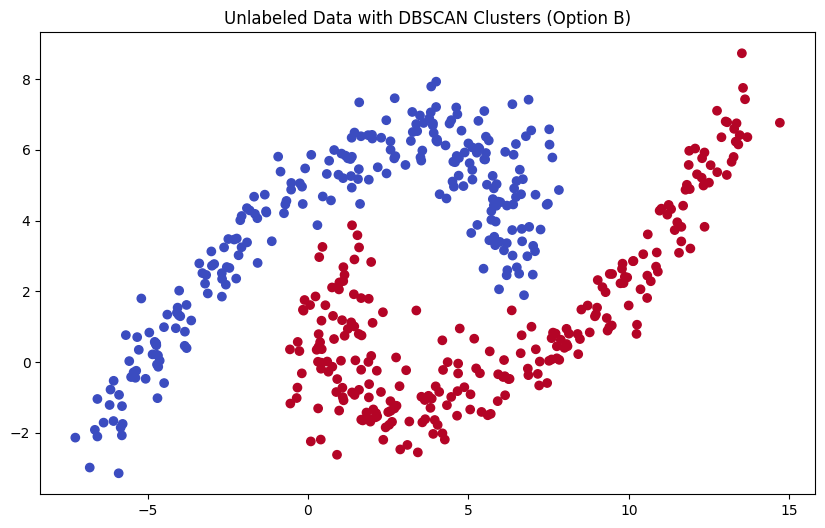

In [28]:
# Let's choose our UMAP solution for submission
y_unlabeled_a = dbscan_umap.labels_.copy()
y_unlabeled_b = dbscan_umap.labels_.copy()

# Option A: Label cluster 0 as -1 and cluster 1 as 1
y_unlabeled_a[y_unlabeled_a == 0] = -1
y_unlabeled_a[y_unlabeled_a == 1] = 1

# Option B: Label cluster 1 as -1 and cluster 0 as 1
y_unlabeled_b[y_unlabeled_b == 1] = -1
y_unlabeled_b[y_unlabeled_b == 0] = 1

plt.figure(figsize=(10, 6))
plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], c=y_unlabeled_a, cmap='coolwarm', marker='o')
plt.title('Unlabeled Data with DBSCAN Clusters (Option A)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], c=y_unlabeled_b, cmap='coolwarm', marker='o')
plt.title('Unlabeled Data with DBSCAN Clusters (Option B)')
plt.show()

In [29]:
from sklearn.svm import SVC

svm_binary_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

model_a = svm_binary_model.fit(X_unlabeled, y_unlabeled_a)
model_b = svm_binary_model.fit(X_unlabeled, y_unlabeled_b)

In [30]:
try:
    test_a = np.array(pd.read_csv(DATA_PATH + "validation_set.csv"))
    test_b = np.array(pd.read_csv(DATA_PATH + "test_set.csv"))

    # Let's go with our model A; I'd recommend submitting both in real scenarios.
    pred_a = model_a.predict(test_a)
    pred_b = model_a.predict(test_b)

    # pred_a = model_b.predict(test_a)
    # pred_b = model_b.predict(test_b)
except FileNotFoundError:
    print(f"Files missing.")

Files missing.


In [31]:
try:
    from scoring import score

    ground_truth_a = np.array(pd.read_csv(DATA_PATH + "validation_set_solutions.csv"))
    ground_truth_b = np.array(pd.read_csv(DATA_PATH + "test_set_solutions.csv"))

    print('Leaderboard A score:', score(ground_truth_a, pred_a))
    print('Leaderboard B score:', score(ground_truth_b, pred_b))
except FileNotFoundError:
    print('Files missing.')

Files missing.
